<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Module 2 - Problem #1 What Is the Top Compliant Type


## Problem Statement

<b>Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first? </b>

In this exercise, you need to read back the 311 datasets that you stored in Cloud Object Store and explore the dataset.

By the end of this exercise, you need to figure out the correct Complaint Type that the Department of Housing Preservation and Development of New York City should focus on.

### 0. Library

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

def display_n(df,n): 
    with pd.option_context('display.max_rows',n*2):
        display(df)

### 1. Load Data From CSV File

In [2]:
df = pd.read_csv(body)

In [3]:
print("Shape of dataframe 311 = ", df.shape, "\n")
display_n(df,5)

Shape of dataframe 311 =  (6019843, 16) 



,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
0,0,45531130,02/02/2020 06:09:17 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10019.0,426 WEST 52 STREET,WEST 52 STREET,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.765132,-73.988993
1,1,45529784,02/02/2020 02:15:24 PM,NaN,UNSANITARY CONDITION,RESIDENTIAL BUILDING,11204.0,1751 67 STREET,67 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.618484,-73.992673
2,2,45527528,02/02/2020 02:27:41 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372.0,87-15 37 AVENUE,37 AVENUE,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.750269,-73.879432
3,3,45530329,02/02/2020 12:13:18 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.853773,-73.881558
4,4,45528814,02/02/2020 01:59:44 PM,NaN,APPLIANCE,RESIDENTIAL BUILDING,11209.0,223 78 STREET,78 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.629745,-74.030533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019838,6019838,44063685,10/15/2019 10:35:45 AM,10/16/2019 05:55:02 PM,HEAT/HOT WATER,RESIDENTIAL BUILDING,10029.0,327 EAST 108 STREET,EAST 108 STREET,ADDRESS,NEW YORK,Closed,The complaint you filed is a duplicate of a co...,MANHATTAN,40.791359,-73.940184
6019839,6019839,44063692,10/15/2019 06:09:28 AM,10/15/2019 04:12:58 PM,HEAT/HOT WATER,RESIDENTIAL BUILDING,10461.0,3555 BRUCKNER BOULEVARD,BRUCKNER BOULEVARD,ADDRESS,BRONX,Closed,The Department of Housing Preservation and Dev...,BRONX,40.847809,-73.827481
6019840,6019840,44063724,10/15/2019 10:54:45 AM,10/16/2019 06:14:29 PM,HEAT/HOT WATER,RESIDENTIAL BUILDING,10034.0,165 SHERMAN AVENUE,SHERMAN AVENUE,ADDRESS,NEW YORK,Closed,The complaint you filed is a duplicate of a co...,MANHATTAN,40.864764,-73.922764
6019841,6019841,44063726,10/15/2019 02:07:34 PM,10/16/2019 07:10:19 PM,HEAT/HOT WATER,RESIDENTIAL BUILDING,10467.0,66 WEST GUN HILL ROAD,WEST GUN HILL ROAD,ADDRESS,BRONX,Closed,The Department of Housing Preservation and Dev...,BRONX,40.883207,-73.884279


In [4]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019843 entries, 0 to 6019842
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Unnamed: 0              6019843 non-null  int64  
 1   Unique Key              6019843 non-null  int64  
 2   Created Date            6019843 non-null  object 
 3   Closed Date             5893186 non-null  object 
 4   Complaint Type          6019843 non-null  object 
 5   Location Type           5967019 non-null  object 
 6   Incident Zip            5939146 non-null  float64
 7   Incident Address        5967018 non-null  object 
 8   Street Name             5967018 non-null  object 
 9   Address Type            5935078 non-null  object 
 10  City                    5939569 non-null  object 
 11  Status                  6019843 non-null  object 
 12  Resolution Description  6012017 non-null  object 
 13  Borough                 6019843 non-null  object 
 14  La

##### Let's clean up the dataset

In [5]:
# drop the first dummy column
df.drop(columns=['Unnamed: 0'], inplace=True)
print("Is Unname column in the dataframe?", ({'Unnamed: 0'}.issubset(df.columns)))

#cast the columns to correct type
# datetime
df['Created Date'] = pd.to_datetime(df['Created Date'], format="%m/%d/%Y %I:%M:%S %p", errors='coerce') #force the invalid to NaT
df['Closed Date'] = pd.to_datetime(df['Closed Date'], format="%m/%d/%Y %I:%M:%S %p", errors='coerce') #force the invalid to NaT

#fix the zipcode - force the nan values to be 0
df['Incident Zip'].replace(np.nan, 0, inplace=True) # let replace all of null with 0
df['Incident Zip'] = df['Incident Zip'].astype('int') #NaN are floats, so let cast the entire column as string

Is Unname column in the dataframe? False


In [6]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ', '_')

In [7]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019843 entries, 0 to 6019842
Data columns (total 15 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   Unique_Key              6019843 non-null  int64         
 1   Created_Date            6019843 non-null  datetime64[ns]
 2   Closed_Date             5893186 non-null  datetime64[ns]
 3   Complaint_Type          6019843 non-null  object        
 4   Location_Type           5967019 non-null  object        
 5   Incident_Zip            6019843 non-null  int64         
 6   Incident_Address        5967018 non-null  object        
 7   Street_Name             5967018 non-null  object        
 8   Address_Type            5935078 non-null  object        
 9   City                    5939569 non-null  object        
 10  Status                  6019843 non-null  object        
 11  Resolution_Description  6012017 non-null  object        
 12  Borough       

##### Now, let's look up if there are any more nulls in the table

In [8]:
# Analyze the number of fields with missing values
df_missing = df.isnull().sum().to_frame().reset_index() # Count number of Null values for all columns in the dataframe
df_missing.rename(columns={'index':'FieldName', 0 : 'NullCount'}, inplace=True) #rename the dataframe 
print("Number of Fields with Missing values: ", df_missing[df_missing['NullCount']!=0].shape[0]) # Report number of fields that have null values > 0
df_missing[df_missing['NullCount']!=0] #Only display field names with missing values

Number of Fields with Missing values:  9


,FieldName,NullCount
2,Closed_Date,126657
4,Location_Type,52824
6,Incident_Address,52825
7,Street_Name,52825
8,Address_Type,84765
9,City,80274
11,Resolution_Description,7826
13,Latitude,80671
14,Longitude,80671


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #1: </h1>
<b>  What is the total number of complaints that exist in the dataset?</b>
</div>

###### Already determined from above that are zero nulls in the Compliant Type





In [9]:
print("Number of Nulls: ", df['Complaint_Type'].isnull().sum())
print("Number of Unique Values: ", df['Complaint_Type'].nunique()) #default inputs will ignore NaN

Number of Nulls:  0
Number of Unique Values:  30


In [10]:
# Display Frequency table
countCT = df['Complaint_Type'].value_counts() #default input values makes this exclude nulls, we're okay since there zero nulls from above
perCT = df['Complaint_Type'].value_counts(normalize=True).round(4)
perStrCT = df['Complaint_Type'].value_counts(normalize=True).mul(100).round(2).astype(str) + "%"

df_freq=pd.DataFrame({'counts': countCT, 'Percentage .4f' : perCT, 'Percentage %': perStrCT}).rename_axis('Unique_Value').reset_index() #create 1 dataframe with stats

print("Total Number of Compliants (excluding nulls) : %s " % '{:,d}'.format(df_freq.counts.sum()) ) #answer to Q1

print("Frequency Count for the Column: Compliant Type ")
df_freq #display dataframe

# df_freq = df['Complaint Type'].value_counts().to_frame("FreqCount").rename_axis("Unique_Value").reset_index() # Just double checking if there nulls
# df_freq

Total Number of Compliants (excluding nulls) : 6,019,843 
Frequency Count for the Column: Compliant Type 


,Unique_Value,counts,Percentage .4f,Percentage %
0,HEAT/HOT WATER,1261574,0.2096,20.96%
1,HEATING,887850,0.1475,14.75%
2,PLUMBING,711130,0.1181,11.81%
3,GENERAL CONSTRUCTION,500863,0.0832,8.32%
4,UNSANITARY CONDITION,451643,0.0750,7.5%
5,PAINT - PLASTER,361257,0.0600,6.0%
6,PAINT/PLASTER,346438,0.0575,5.75%
7,ELECTRIC,307310,0.0510,5.1%
8,NONCONST,260890,0.0433,4.33%
9,DOOR/WINDOW,205278,0.0341,3.41%


### Conclusion

No need for visual to see that **Heating** related-issues **(Heat/Hot Water and Heating)**. It seems like there should be Complaint Types hierarchy to regroup related issues. 

I see some duplication and related issues, but I will make some assumptions when I try to rename (relabel/regroup) after I answer the module questions

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #2: </h1>
<b>  How many differnt Complaint Types can you find in the dataset, including duplicates entries of the same type?</b>
</div>

In [11]:
print("Number of Unique Values for Complaint Type: ", df['Complaint_Type'].nunique()) #default inputs will ignore NaN

Number of Unique Values for Complaint Type:  30


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #3: </h1>
<b>  How many Elevator complaints can you find in the dataset?</b>
</div>

In [12]:
df_eval_freq = df_freq[df_freq['Unique_Value'].str.upper().str.contains("ELEVATOR", case=False)]
print("Total Counts ",df_eval_freq['counts'].sum() )
df_eval_freq

Total Counts  6725


,Unique_Value,counts,Percentage .4f,Percentage %
17,ELEVATOR,6725,0.0011,0.11%


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #4: </h1>
<b>  How many Electric complaints can you find in the dataset?</b>
</div>

In [13]:
df_electric_freq = df_freq[df_freq['Unique_Value'].str.contains("Electric", case=False)]
print("Total Counts ",df_electric_freq['counts'].sum() )
df_electric_freq

Total Counts  307311


,Unique_Value,counts,Percentage .4f,Percentage %
7,ELECTRIC,307310,0.051,5.1%
28,Electric,1,0.000,0.0%


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #5: </h1>
<b>  Using 800,000 as a threshold, what complaint type(s) do you recommend the Department of Housing Preservation and Development of New York City address first? Select all that apply [Multiple choice].</b>
</div>

In [14]:
# test based on threshold and multiple choice
df_800 = df_freq[(df_freq['counts'] > 800000) 
                 & (df_freq['Unique_Value'].str.contains("Heating|Construction|Safety|Heat/Hot Water|Elevator", case=False)) #i cross reference the multiple choice answers in the questions lol
                ]
print("Total Counts ",df_800['counts'].sum() )
print("# of Compliant Types:  ",df_800.shape[0] )
df_800

Total Counts  2149424
# of Compliant Types:   2


,Unique_Value,counts,Percentage .4f,Percentage %
0,HEAT/HOT WATER,1261574,0.2096,20.96%
1,HEATING,887850,0.1475,14.75%


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Additional Thoughts </h1>
<b>  Probably a good idea to understand year trend</b>
</div>

## 1. First Get General Understanding on the Overall Yearly Trend

In [15]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


In [16]:
print("Min Created Date: " , df['Created_Date'].min() )
print("Max Created Date: " , df['Created_Date'].max() )

Min Created Date:  2010-01-01 00:00:00
Max Created Date:  2020-02-02 23:58:57


In [17]:
#DF for graph 1
grp_year = df.groupby(df.Created_Date.dt.year, as_index=False)
df_year_freq = grp_year.size()

#DF for graph 2
grp_year_status = df.groupby([df.Created_Date.dt.year, df.Status]).size().unstack('Status', fill_value=0)

#DF for graph 3
grp_year_Borough = df.groupby([df.Created_Date.dt.year, df.Borough]).size().unstack('Borough', fill_value=0)

#DF for graph 4
grp_year_CT = df.groupby([df.Created_Date.dt.year, df.Complaint_Type]).size().unstack('Complaint_Type', fill_value=0)

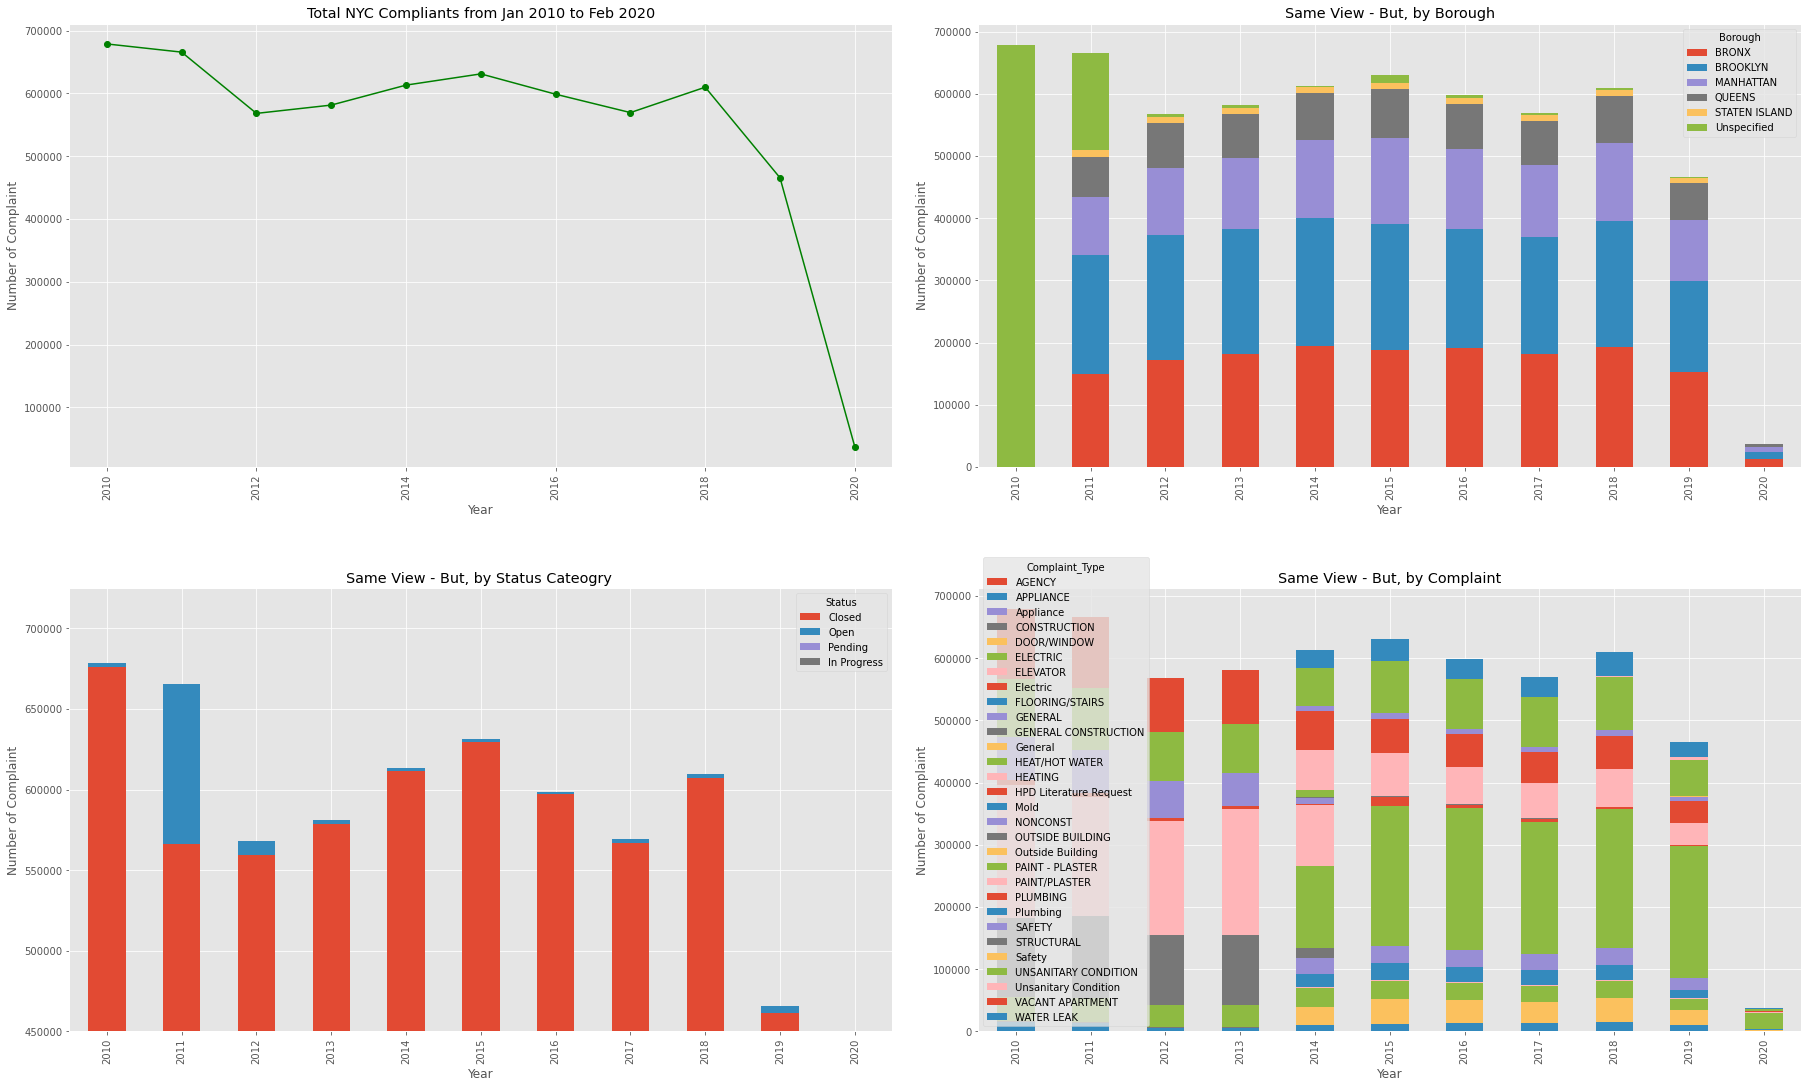

In [18]:
#Creating Instance of Subplots()
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(25, 15), constrained_layout=True) 

#Graph Dataframe #1
df_year_freq.plot(ax=axes[0,0] , kind='line', color='green', marker='o', rot=90, subplots=True) 
axes[0,0].set_title('Total NYC Compliants from Jan 2010 to Feb 2020')
# axes[0,0].set_ylim((450000,725000))

#Graph Dataframe #2
grp_year_Borough.plot.bar(ax=axes[0,1],stacked=True, rot=90)
axes[0,1].set_title('Same View - But, by Borough')

#Graph Dataframe #3
grp_year_status.loc[:,['Closed','Open', 'Pending','In Progress']].plot.bar(ax=axes[1,0] ,stacked=True, rot=90)
axes[1,0].set_title('Same View - But, by Status Cateogry ')
axes[1,0].set_ylim((450000,725000))

#Graph Dataframe #4
grp_year_CT.plot.bar(ax=axes[1,1],stacked=True, rot=90)
axes[1,1].set_title('Same View - But, by Complaint')

# Apply the same conditions for all axes
for ax in axes.flat:
    ax.set(xlabel='Year', ylabel='Number of Complaint')



plt.show()

In [19]:
# Find a duplicate rows - double check if there are duplicate records; there could be duplicate entries just simply from slightly variations in the input values
#luckily there 0 from this simple check
df_duplicates = df[df.duplicated()]
df_duplicates

,Unique_Key,Created_Date,Closed_Date,Complaint_Type,Location_Type,Incident_Zip,Incident_Address,Street_Name,Address_Type,City,Status,Resolution_Description,Borough,Latitude,Longitude


In [20]:
# Just wanted a better understanding on this
df['Resolution_Description'].unique()[0:5]

array(['The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.',
       'The complaint you filed is a duplicate of a condition already reported by another tenant for a building-wide condition. The original complaint is still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection of your unit if the original complainant is not available for verification.',
       "The Department of Housing Preservation and Development conducted or attempted to conduct an inspection.  More information about inspection results can be found through HPD's website at www.nyc.gov/hpd by using HPDONLINE (enter your address on the home page) and entering your SR number under the complaint status option.",
       nan,
       'The Department of Housing Preservation and Development responded to a complaint of no heat or hot water and was advised by a tenant in the 

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Additional Thoughts </h1>
<b>  Should cleanup the dataset and reexamine the dataset</b>
</div>

## <font color='blue'> 0. We should probably clean up [Compliant_Type] columns</font>

### Made everything capital <code class="code"><font color='crimson'>str.upper()</font></code> and <code class="code"><font color='crimson'>str.strip()</font></code> remove leading and trailing white spaces

For example, for Complaint types, there were double instances of Electric. Let's do it for string columns

In [21]:
df['Complaint_Type'] = df['Complaint_Type'].str.upper().str.strip() #Complaint Types


In [22]:
fix_cols = ['Location_Type','Incident_Address','Street_Name','Address_Type','City','Status'  ]
for i, name in enumerate(fix_cols):
    df[name]=df[name].str.upper().str.strip()

In [23]:
display_n(df,5)

,Unique_Key,Created_Date,Closed_Date,Complaint_Type,Location_Type,Incident_Zip,Incident_Address,Street_Name,Address_Type,City,Status,Resolution_Description,Borough,Latitude,Longitude
0,45531130,2020-02-02 06:09:17,NaT,HEAT/HOT WATER,RESIDENTIAL BUILDING,10019,426 WEST 52 STREET,WEST 52 STREET,ADDRESS,NEW YORK,OPEN,The following complaint conditions are still o...,MANHATTAN,40.765132,-73.988993
1,45529784,2020-02-02 14:15:24,NaT,UNSANITARY CONDITION,RESIDENTIAL BUILDING,11204,1751 67 STREET,67 STREET,ADDRESS,BROOKLYN,OPEN,The following complaint conditions are still o...,BROOKLYN,40.618484,-73.992673
2,45527528,2020-02-02 02:27:41,NaT,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372,87-15 37 AVENUE,37 AVENUE,ADDRESS,JACKSON HEIGHTS,OPEN,The following complaint conditions are still o...,QUEENS,40.750269,-73.879432
3,45530329,2020-02-02 12:13:18,NaT,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,OPEN,The following complaint conditions are still o...,BRONX,40.853773,-73.881558
4,45528814,2020-02-02 13:59:44,NaT,APPLIANCE,RESIDENTIAL BUILDING,11209,223 78 STREET,78 STREET,ADDRESS,BROOKLYN,OPEN,The following complaint conditions are still o...,BROOKLYN,40.629745,-74.030533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019838,44063685,2019-10-15 10:35:45,2019-10-16 17:55:02,HEAT/HOT WATER,RESIDENTIAL BUILDING,10029,327 EAST 108 STREET,EAST 108 STREET,ADDRESS,NEW YORK,CLOSED,The complaint you filed is a duplicate of a co...,MANHATTAN,40.791359,-73.940184
6019839,44063692,2019-10-15 06:09:28,2019-10-15 16:12:58,HEAT/HOT WATER,RESIDENTIAL BUILDING,10461,3555 BRUCKNER BOULEVARD,BRUCKNER BOULEVARD,ADDRESS,BRONX,CLOSED,The Department of Housing Preservation and Dev...,BRONX,40.847809,-73.827481
6019840,44063724,2019-10-15 10:54:45,2019-10-16 18:14:29,HEAT/HOT WATER,RESIDENTIAL BUILDING,10034,165 SHERMAN AVENUE,SHERMAN AVENUE,ADDRESS,NEW YORK,CLOSED,The complaint you filed is a duplicate of a co...,MANHATTAN,40.864764,-73.922764
6019841,44063726,2019-10-15 14:07:34,2019-10-16 19:10:19,HEAT/HOT WATER,RESIDENTIAL BUILDING,10467,66 WEST GUN HILL ROAD,WEST GUN HILL ROAD,ADDRESS,BRONX,CLOSED,The Department of Housing Preservation and Dev...,BRONX,40.883207,-73.884279


## <font color='blue'> 1. Let's focus on Complaint_Types</font>

In [24]:
countCT = df['Complaint_Type'].value_counts()
countCT

HEAT/HOT WATER            1261574
HEATING                    887850
PLUMBING                   711141
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       457142
PAINT - PLASTER            361257
PAINT/PLASTER              346438
ELECTRIC                   307311
NONCONST                   260890
DOOR/WINDOW                205278
WATER LEAK                 193631
GENERAL                    152471
FLOORING/STAIRS            137402
APPLIANCE                  112835
HPD LITERATURE REQUEST      52824
SAFETY                      51953
OUTSIDE BUILDING             7148
ELEVATOR                     6725
CONSTRUCTION                 5078
STRUCTURAL                     16
AGENCY                          9
VACANT APARTMENT                6
MOLD                            1
Name: Complaint_Type, dtype: int64

In [25]:
df['year_created'] = pd.DatetimeIndex(df['Created_Date']).year #create a year column
display_n(df[['Created_Date','year_created']],5)

,Created_Date,year_created
0,2020-02-02 06:09:17,2020
1,2020-02-02 14:15:24,2020
2,2020-02-02 02:27:41,2020
3,2020-02-02 12:13:18,2020
4,2020-02-02 13:59:44,2020
...,...,...
6019838,2019-10-15 10:35:45,2019
6019839,2019-10-15 06:09:28,2019
6019840,2019-10-15 10:54:45,2019
6019841,2019-10-15 14:07:34,2019


### <font color="blue">Visual the data in matrix (Compliant Type vs. Year)</font>

#### Libraries

In [26]:
# import pandas as pd
# import numpy as np

# import matplotlib.pyplot as plt
import seaborn as sns

#### Get the Matrix - Before Clean Up on Labels

In [ ]:
#replace the Heating  'num-of-doors' values by the most frequent 
pivot_countCT = df.groupby(['Complaint_Type','year_created']).size().unstack('year_created', fill_value=0) # Get Compliant Type vs. Year - Count Row Frequency
pivot_countCT['Total'] = pivot_countCT.sum(axis=1)  #create a totla column

pivot_countCT.sort_values(['Total'], ascending=False, axis=0, inplace=True) #Sort the matrix in place by total before "graphing"

# Instead of just a simple display of matrx, let's use SNS instead
plt.figure(figsize=(15,10)) #figure size
sns.heatmap(pivot_countCT.drop(['Total'], axis=1), cmap="Greens", annot=True, fmt="d", linewidths=1.5) #SNS heat map

<b> My thoughts </b>

<b> It looks like some labels were deprecated sometime from 2010 to present day. Not completely obvious what mapping should be from old labels to labels </b>

- **Heating** could be the same thing as **Heat/Hot Water**; Look how the label could have possible changed; 2010 to 2014 and 2014 to 2020
    - Still, human error could have led to miscategorizing because I feel that this in the realm of **Plumbing**
    - To make things simple, we'll just combine this labels as one
    
- **Water Leak** should relabeled as **Plumbing** 
    
- **General** should be relabel as **General Construction** ; Just juding based on name
    - Possible things that make up General Consruction
        - Door/Window
        - Flooring/Stairs
    - For now, we won't relabeled these 2 as general construction 
        
- **Paint/Plaster** will be relabel as **Paint-Plaster** (this has the higher counts)

- **Nonconst** was stopped in-use in 2014; I assume it means not construction
    - To keep things simple, we'll ignore this category for now

<b>This shows old labels need to remapped or we should be provided a hierarchy for complaint types</b>  

I am going to leverage the below method
```PYTHON
df['COLUMN NAME'].replace('oldvalue', 'newvalue') 
```

In [29]:
df['Complaint_Type'].replace('HEATING', 'HEAT/HOT WATER', inplace=True) 
df['Complaint_Type'].replace('WATER LEAK', 'PLUMBING', inplace=True) 
df['Complaint_Type'].replace('GENERAL', 'GENERAL CONSTRUCTION', inplace=True) 
df['Complaint_Type'].replace('PAINT/PLASTER', 'PAINT - PLASTER', inplace=True) 

#### Let's redo the heatmap

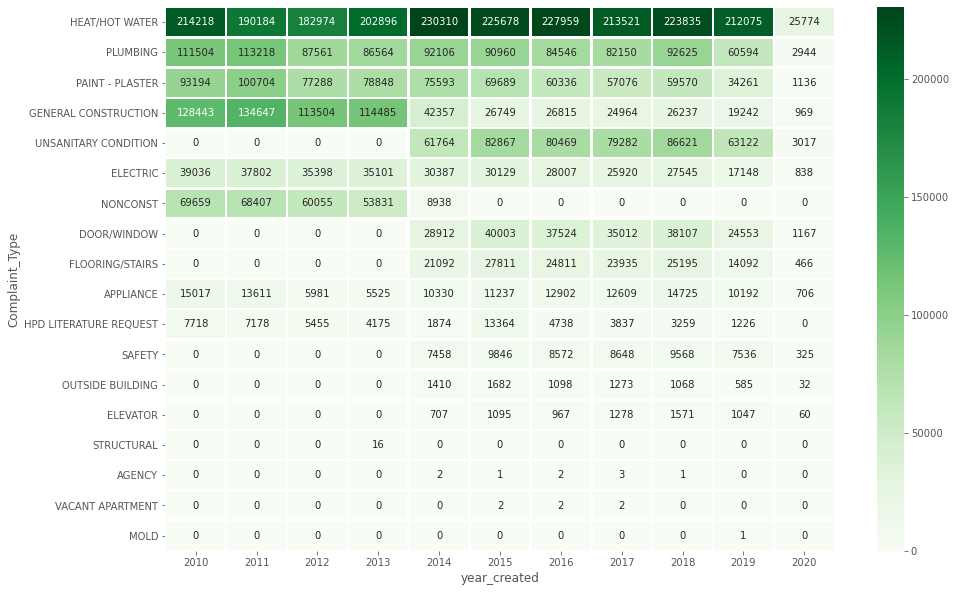

In [30]:
pivot_countCT = df.groupby(['Complaint_Type','year_created']).size().unstack('year_created', fill_value=0) # Get Compliant Type vs. Year - Count Row Frequency
pivot_countCT['Total'] = pivot_countCT.sum(axis=1)  #create a total column

pivot_countCT.sort_values(['Total'], ascending=False, axis=0, inplace=True) #Sort the matrix in place by total before "graphing"

# Instead of just a simple display of matrx, let's use SNS instead
plt.figure(figsize=(15,10)) #figure size
sns.heatmap(pivot_countCT.drop(['Total'], axis=1), cmap="Greens", annot=True, fmt="d", linewidths=1.5) #SNS heat map

In [31]:
pivot_countCT

year_created,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
Complaint_Type,,,,,,,,,,,,
HEAT/HOT WATER,214218,190184,182974,202896,230310,225678,227959,213521,223835,212075,25774,2149424
PLUMBING,111504,113218,87561,86564,92106,90960,84546,82150,92625,60594,2944,904772
PAINT - PLASTER,93194,100704,77288,78848,75593,69689,60336,57076,59570,34261,1136,707695
GENERAL CONSTRUCTION,128443,134647,113504,114485,42357,26749,26815,24964,26237,19242,969,658412
UNSANITARY CONDITION,0,0,0,0,61764,82867,80469,79282,86621,63122,3017,457142
ELECTRIC,39036,37802,35398,35101,30387,30129,28007,25920,27545,17148,838,307311
NONCONST,69659,68407,60055,53831,8938,0,0,0,0,0,0,260890
DOOR/WINDOW,0,0,0,0,28912,40003,37524,35012,38107,24553,1167,205278
FLOORING/STAIRS,0,0,0,0,21092,27811,24811,23935,25195,14092,466,137402


## Lookup the Top 5 complaints

In [32]:
pivot_countCT.columns = list(map(str, pivot_countCT.columns)) # convert the column names to string
years = list(map(str, range(2010, 2021))) # Get a range from 2010 to 2020

pivot_countCT.sort_values(['Total'], ascending=False, axis=0, inplace=True) #sort the dataframer

# get the top 5 entries
df_top5 = pivot_countCT.head()

# transpose the dataframe
df_top5 = df_top5[years].transpose() #we use the years range to get the order of we want for the table

df_top5.head()

Complaint_Type,HEAT/HOT WATER,PLUMBING,PAINT - PLASTER,GENERAL CONSTRUCTION,UNSANITARY CONDITION
2010,214218,111504,93194,128443,0
2011,190184,113218,100704,134647,0
2012,182974,87561,77288,113504,0
2013,202896,86564,78848,114485,0
2014,230310,92106,75593,42357,61764


### Graphing with matplot lib
### Libraries

In [33]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

### Plotting Area Plot

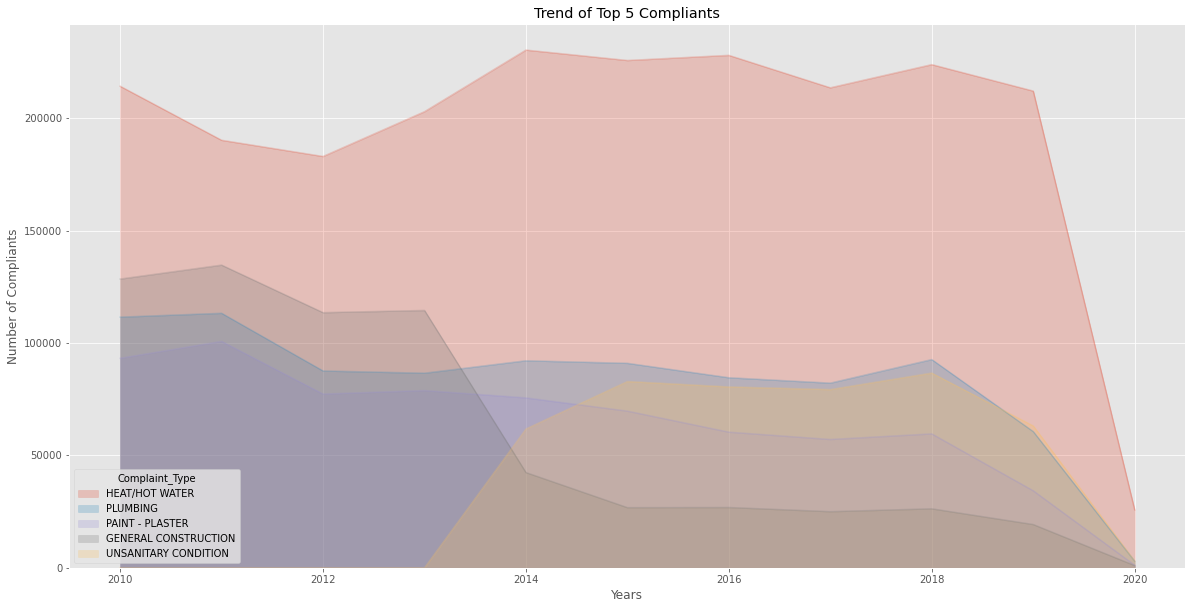

In [34]:
df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='area', 
             alpha=0.25, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(20, 10),
            )

plt.title('Trend of Top 5 Compliants')
plt.ylabel('Number of Compliants')
plt.xlabel('Years')

plt.show()

### Let's focus only the top 3. 

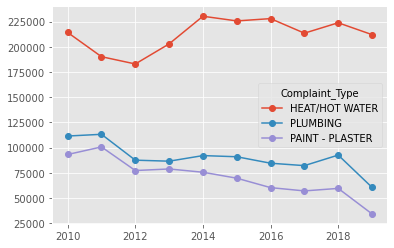

In [42]:
df_top3=df_top5.iloc[:-1, 0:3] #exclude last row which is 2020
df_top3.plot(kind='line', marker='o')

Plumbing and and Paint-Plaster look very similar